# **Basic Python**

## 1.a 
Give a function F that takes a single argument n. This function should print a sequence of n strings as described in the examples below: <br>
Ex: **n = 3**

--A--<br>
-BAB-<br>
CBABC<br>

**n = 4**

---A---<br>
--BAB--<br>
-CBABC-<br>
DCBABCD

In [13]:
def F(n):
    for i in range(n):
        seq="".join(
            chr(65+ abs(j-i))
            for j in range(2*i+1)
        )
        final_seq="-" * (n-i-1) + seq + "-" * (n-i-1)
        print(final_seq + "\n")
    pass

# Tests
F(10)
F(6)

---------A---------

--------BAB--------

-------CBABC-------

------DCBABCD------

-----EDCBABCDE-----

----FEDCBABCDEF----

---GFEDCBABCDEFG---

--HGFEDCBABCDEFGH--

-IHGFEDCBABCDEFGHI-

JIHGFEDCBABCDEFGHIJ

-----A-----

----BAB----

---CBABC---

--DCBABCD--

-EDCBABCDE-

FEDCBABCDEF



## 1.b
Make a function F that takes only one argument, a dictionary(dict) d.
The keys of d are integers and the values of d are a tuple of type (x (int), y (int)).
You must print out the dict in the format "-key-, -x-, -y-" with each entry in a new line. Print it for each of the three sorted orders, by key values ascending, by x values descending, by y values ascending.

In [15]:
def F(d : dict):
    print("Sorted by keys ascending:")
    for key in sorted(d.keys()):
        x, y = d[key]
        print(f"-{key}-, -{x}-, -{y}-")
    
    print("\nSorted by x values descending:")
    for key in sorted(d.keys(), key=lambda k: d[k][0], reverse=True):
        x, y = d[key]
        print(f"-{key}-, -{x}-, -{y}-")
    
    print("\nSorted by y values ascending:")
    for key in sorted(d.keys(), key=lambda k: d[k][1]):
        x, y = d[key]
        print(f"-{key}-, -{x}-, -{y}-")

    pass

# Tests
F({1 : (1, 2), 2 : (-1, 4), 5 : (-4, 3), 4 : (2, 3)})
F({-8 : (4, 2), 6 : (-3, 4), 7 : (2, 1), 5 : (9, -10)})

Sorted by keys ascending:
-1-, -1-, -2-
-2-, --1-, -4-
-4-, -2-, -3-
-5-, --4-, -3-

Sorted by x values descending:
-4-, -2-, -3-
-1-, -1-, -2-
-2-, --1-, -4-
-5-, --4-, -3-

Sorted by y values ascending:
-1-, -1-, -2-
-5-, --4-, -3-
-4-, -2-, -3-
-2-, --1-, -4-
Sorted by keys ascending:
--8-, -4-, -2-
-5-, -9-, --10-
-6-, --3-, -4-
-7-, -2-, -1-

Sorted by x values descending:
-5-, -9-, --10-
--8-, -4-, -2-
-7-, -2-, -1-
-6-, --3-, -4-

Sorted by y values ascending:
-5-, -9-, --10-
-7-, -2-, -1-
--8-, -4-, -2-
-6-, --3-, -4-


## 2 Working with Student Records

Use the data in **student_records.csv** to complete the given tasks. Do not include any external libraries. Use a Python dictionary if required.

### Reference
- [Python Dictionaries](https://www.w3schools.com/python/python_dictionaries.asp)


#### 2.a: open the student_records.csv file and print out the first 10 rows

In [2]:
#TODO
import pandas as pd
df = pd.read_csv('/Users/anousha_puvvala/Downloads/student_records.csv')
print(df.head(10))

   roll_number department  credit course_name      course_type grade
0       588946         MA       3       EC250  hasmed_elective    AB
1       145372         EP       4       EP407  hasmed_elective    CC
2       834515         MA       8       EP885  hasmed_elective    BB
3       344265        CSE       6      CSE699          honours    AB
4       358405         MA       3       EE460            minor    AP
5       781075         CE       8       CE540          honours    CC
6       180828        CSE       6       CE880            minor    AB
7       981238         MM       4      CSE226            minor    AB
8       836881         MM       8       MM530             core    AA
9       310604         EE       8       EE202             core    AB


#### 2.b: Print out the total credits and calculte CPI of each student. 
CPI is the weighted average of core courses, and electives (weights being the letter grades converted to number AP,AA=10, AB=9, BB=9, BC=7, CC=6)

In [3]:
#TODO
import pandas as pd

def cpi(filename):
    df = pd.read_csv(filename)
    df = df[~df['course_type'].isin(['minor', 'honours', 'alc'])] 

    grade_points = {'AP': 10, 'AA': 10, 'AB': 9, 'BB': 8, 'BC': 7, 'CC': 6}
    df['grade_points'] = df['grade'].map(grade_points)

    result = df.groupby('roll_number').apply(
        lambda group: pd.Series({
            'total_credits': group['credit'].sum(),
            'CPI': (group['grade_points'] * group['credit']).sum() / group['credit'].sum()
        })
    )
    print(result)

cpi('/Users/anousha_puvvala/Downloads/student_records.csv')


             total_credits       CPI
roll_number                         
124663               100.0  8.230000
138296               114.0  7.991228
143142               135.0  8.562963
143856               122.0  8.491803
144528               112.0  8.571429
...                    ...       ...
981238               120.0  8.275000
986057               148.0  7.925676
993835                99.0  8.424242
995208                88.0  7.590909
998293               150.0  8.560000

[100 rows x 2 columns]


/var/folders/23/0dy32s8d7wqb27pvgk27m4c40000gn/T/ipykernel_22880/1966657168.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = df.groupby('roll_number').apply(


#### 2.c: Print out the names of all students who meet the graduation requirements 
Atleast 20 credist of core course, 15 credits of department elective, 10 credits of flexible elective and 5 credits of hasmed electives

In [11]:
#TODO
import pandas as pd

def graduation_requirements(filename):
    df = pd.read_csv(filename)

    core_courses = df[df['course_type'] == 'core']
    dept_electives = df[df['course_type'] == 'department_elective']
    flex_electives = df[df['course_type'] == 'felxible_elective']
    hasmed_electives = df[df['course_type'] == 'hasmed_elective']

    core_credits = core_courses.groupby('roll_number')['credit'].sum()
    dept_elective_credits = dept_electives.groupby('roll_number')['credit'].sum()
    flex_elective_credits = flex_electives.groupby('roll_number')['credit'].sum()
    hasmed_elective_credits = hasmed_electives.groupby('roll_number')['credit'].sum()

    requirements = pd.DataFrame({
        'core_credits': core_credits,
        'dept_elective_credits': dept_elective_credits,
        'flex_elective_credits': flex_elective_credits,
        'hasmed_elective_credits': hasmed_elective_credits
    })

    eligible_students = requirements[
        (requirements['core_credits'] >= 20) & 
        (requirements['dept_elective_credits'] >= 15) & 
        (requirements['flex_elective_credits'] >= 10) & 
        (requirements['hasmed_elective_credits'] >= 5)
    ]

    for student_id in eligible_students.index:
        print(student_id)

graduation_requirements('/Users/anousha_puvvala/Downloads/student_records.csv')


124663
143142
143856
144528
150503
159438
180828
203200
207443
214270
265922
282482
283796
294697
310604
327122
362471
379479
381227
388969
391848
461971
482623
485484
488661
500658
517837
521087
534763
571782
572815
581065
581858
588946
608522
608952
626000
628849
630568
681499
692318
703403
716985
721490
750259
773982
781075
782129
787967
810863
834515
836881
845623
871746
879634
881983
888886
928288
955757
960395
970791
971123
973158
981238
986057
998293


#### 2.d: Print out the names of all students who completed a minor 
Atleast 10 credits with minor tag in a specific department

In [14]:
#TODO
import pandas as pd

def minor_requirements(filename):
    df = pd.read_csv(filename)
    minor = df[df['course_type']=='minor']
    minor_credits = minor.groupby(['roll_number','department'])['credit'].sum()

    minor_completed = minor_credits[minor_credits>=10]
    student_ids = minor_completed.index.get_level_values('roll_number').unique()

    for student_id in student_ids:
        print(student_id)

minor_requirements('/Users/anousha_puvvala/Downloads/student_records.csv')

    

124663
138296
143142
143856
144528
145372
150503
159438
180828
194063
199713
203200
207443
208100
214270
265922
270007
282482
283796
294697
301135
327122
329535
344265
358405
362471
364146
379479
381227
381526
388969
391848
458200
461584
461971
465496
478606
482623
485484
488661
500658
517837
521087
534763
571782
572815
581065
581858
582912
588946
597353
608522
608952
613401
626000
628849
630568
680096
681499
692318
703403
716985
718510
721490
733782
750259
773982
775967
781075
782129
787967
788020
810863
816041
834515
836431
836881
841365
845623
847809
851029
871746
879634
881983
888886
907454
955757
960395
970791
971123
973158
981238
986057
993835
995208
998293


#### 2.e: Print out the names of all students who completed a honours
Atleast 10 credits with honours tag and 20 core credits

In [17]:
#TODO
import pandas as pd

def students_with_honours(filename):
    df = pd.read_csv(filename)
    honours_courses = df[df['course_type'] == 'honours']
    core_courses = df[df['course_type'] == 'core']
    honours_credits = honours_courses.groupby('roll_number')['credit'].sum()
    core_credits = core_courses.groupby('roll_number')['credit'].sum()
    credits = pd.DataFrame({
        'honours_credits': honours_credits,
        'core_credits': core_credits
    })
    eligible_students = credits[
        (credits['honours_credits'] >= 10) & 
        (credits['core_credits'] >= 20)
    ]
    for student_id in eligible_students.index:
        print(student_id)

students_with_honours('/Users/anousha_puvvala/Downloads/student_records.csv')


124663
143142
143856
144528
145372
150503
159438
199713
203200
207443
208100
214270
265922
282482
283796
294697
310604
327122
362471
364146
379479
388969
391848
458200
461971
465496
482623
485484
488661
500658
517837
521087
534763
571782
572815
581065
581858
582912
588946
589528
608522
608952
613401
626000
628849
630568
681499
692318
703403
716985
718510
721490
750259
773982
781075
782129
787967
788020
810863
834515
836881
845623
870642
871746
879634
881983
888886
928288
955757
960395
970791
971123
973158
986057
998293


# **SciPy** 

## Part A
Minimize the function $f(x, y) = 2(x - y - 3)^2 + 4(x + 2y + 1)^4$.<br>
With the constraints : $ x - y \ge -3, (x + 2)^2 + (y + 1)^2 \le 5$ <br>
Using scipy.optimize.minimize with constraints. (Hint: Look at the examples in the official documentation)

In [18]:
#TODO
import numpy as np
from scipy.optimize import minimize

def objective(var):
    x, y = var
    return 2 * (x - y - 3)**2 + 4 * (x + 2*y + 1)**4

def linear_constraint(var):
    x, y = var
    return x - y + 3

def nonlinear_constraint(var):
    x, y = var
    return 5 - ((x + 2)**2 + (y + 1)**2)

initial_guess = [0, 0]

constraints = [
    {'type': 'ineq', 'fun': linear_constraint},   
    {'type': 'ineq', 'fun': nonlinear_constraint} 
]

result = minimize(objective, initial_guess, constraints=constraints, method='SLSQP')

if result.success:
    print("Optimal solution found:")
    print(f"x = {result.x[0]:.4f}, y = {result.x[1]:.4f}")
    print(f"Minimum value of f(x, y) = {result.fun:.4f}")
else:
    print("Optimization failed:", result.message)


Optimal solution found:
x = 0.2349, y = -0.9285
Minimum value of f(x, y) = 7.3450


# Part B
Evaluate the line integral of the function $f(x, y) = x^2 + y^4$ along the circle $ x^2 + y^2 = 3 $ anticlockwise (scalar integral, not vector). You must use scipy for integration but you may use parameterization

In [19]:
#TODO
import numpy as np
from scipy.integrate import quad

def f(t):
    x = np.sqrt(3) * np.cos(t)
    y = np.sqrt(3) * np.sin(t)
    return np.sqrt(3) * (x**2 + y**4)

result, error = quad(f, 0, 2 * np.pi)

print(f"Line integral result: {result:.6f}")
print(f"Estimated error: {error:.6e}")


Line integral result: 53.053631
Estimated error: 5.376845e-09


# **Numpy**

### Read Lisan_Al_Gaib.pdf for problem description and complete the following functions

In [ ]:
import time # to time the execution
import numpy as np
import matplotlib.pyplot as plt

In [20]:
### TODO 1
### Load data from data_path
### Check the input file spice_locations.txt to understand the Data Format
### Return : np array of size Nx2
import numpy as np
def load_data(data_path):
    try:
        coordinates = np.loadtxt(data_path, delimiter=',')
        return coordinates
    except Exception as e:
        print(f"An error occurred while loading the file: {e}")
        return None
file_path=('/Users/anousha_puvvala/Downloads/spice_locations.txt')
load_data(file_path)

array([[-2.12729941e+00,  1.75357153e+00],
       [-3.40030291e-01, -6.70757901e-03],
       [-3.21990680e+00, -2.22002740e+00],
       [-3.70958194e+00,  1.33088073e+00],
       [-9.94424941e-01,  5.40362889e-01],
       [-3.89707753e+00,  1.84954926e+00],
       [ 1.62213204e-01, -1.93830445e+00],
       [-3.09087516e+00, -2.08297745e+00],
       [-2.47878879e+00, -3.76217842e-01],
       [-1.84027491e+00, -1.54385430e+00],
       [-9.40735526e-01, -2.30253070e+00],
       [-2.53927676e+00, -1.16819078e+00],
       [-1.71965008e+00,  9.25879807e-01],
       [-3.00163109e+00, -4.28827808e-01],
       [-1.03792716e+00, -2.76774794e+00],
       [-9.62275740e-01, -2.14737938e+00],
       [-3.67474204e+00,  1.74442769e+00],
       [ 8.28160165e-01,  1.04198674e+00],
       [-2.47693115e+00, -2.51163943e+00],
       [-5.78834867e-01, -7.99237531e-01],
       [-3.38980883e+00, -5.24115449e-01],
       [-3.82805739e+00,  1.54660201e+00],
       [-2.70610009e+00,  3.12611422e-01],
       [-2.

In [28]:
### TODO 2.1
### If init_centers is None, initialize the centers by selecting K data points at random without replacement
### Else, use the centers provided in init_centers
### Return : np array of size Kx2
import numpy as np

def initialize_centers(data, K, init_centers=None):
    if init_centers is None:
        indices = np.random.choice(data.shape[0], size=K, replace=False)
        centers = data[indices]
        return centers
    else:
        return None
    
k=2
centers=initialize_centers(load_data(file_path),k)
print(centers)


[[-3.67474204  1.74442769]
 [-1.03792716 -2.76774794]]


In [29]:
### TODO 2.2
### Initialize the labels to all ones to size (N,) where N is the number of data points
### Return : np array of size N
import numpy as np

def initialize_labels(data):
    N = data.shape[0]  
    labels = np.ones(N)  
    return labels
initialize_labels(load_data(file_path))

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [32]:
### TODO 3.1 : E step
### For Each data point, find the distance to each center
### Return : np array of size NxK
import numpy as np

def compute_distances(data, centers):
    N = data.shape[0] 
    K = centers.shape[0] 
    distances = np.zeros((N, K))  
    for i in range(N):
        for j in range(K):
            distances[i, j] = np.linalg.norm(data[i] - centers[j])
    return distances
distances=compute_distances(load_data(file_path),centers)
print(distances)


[[ 1.54746964  4.6507055 ]
 [ 3.76653384  2.84787708]
 [ 3.99046103  2.24967396]
 [ 0.41501193  4.89249386]
 [ 2.93834507  3.30839684]
 [ 0.24593417  5.43085392]
 [ 5.3183401   1.45887401]
 [ 3.87168317  2.16414097]
 [ 2.43463378  2.79204198]
 [ 3.76537755  1.46344715]
 [ 4.88391889  0.47526129]
 [ 3.12612024  2.19377157]
 [ 2.11952947  3.75601279]
 [ 2.2751083   3.05396144]
 [ 5.2261383   0.        ]
 [ 4.74379971  0.62496422]
 [ 0.          5.2261383 ]
 [ 4.55736234  4.24221171]
 [ 4.42140907  1.46161694]
 [ 4.00685337  2.02133593]
 [ 2.28636718  3.25042061]
 [ 0.25028104  5.13794144]
 [ 1.72868882  3.50305791]
 [ 2.47348622  2.75276266]
 [ 4.51591238  0.72877571]
 [ 4.60535019  4.10254588]
 [ 4.38058345  4.58315118]
 [ 2.66766289  4.37720504]
 [ 3.76633746  2.62819997]
 [ 3.11935129  3.07078137]
 [ 8.05357586  8.69320925]
 [10.27809032 10.42117853]
 [ 8.11612533  9.57433687]
 [ 8.27241798 10.47044811]
 [ 8.65380757 11.23251768]
 [ 9.7976183   9.65990779]
 [ 7.80745981 10.31128659]
 

In [36]:
### TODO 3.2 : E step
### For Each data point, assign the label of the nearest center
### Return : np array of size N
def update_labels(distances):
    try:
        labels = np.argmin(distances, axis=1)
        return labels
    except Exception as e:
        return None
labels=update_labels(distances)
print(labels)

[0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0]


In [39]:
### TODO 4 : M step
### Update the centers to the mean of the data points assigned to it
### Return : np array of size Kx2
import numpy as np

def update_centers(data, labels, K):
    updated_centers = np.zeros((K, 2))  
    try:
        for k in range(K):
            assigned_points = data[labels == k]
            if len(assigned_points) > 0:
                updated_centers[k] = np.mean(assigned_points, axis=0)
                return updated_centers
    except Exception as e:
        return None
updated_centers=update_centers(load_data(file_path),labels,2)
print(updated_centers)

[[1.92250327 3.90939417]
 [0.         0.        ]]


In [40]:
### TODO 6 : Check convergence
### Check if the labels have changed from the previous iteration
### Return : True / False
def check_termination(labels1, labels2):
    try:
        return (np.array_equal(labels, updated_labels))
    except Exception as e:
        return None
updated_labels=update_labels(compute_distances(load_data(file_path),updated_centers))
check_termination(labels, updated_labels)

False

In [48]:
### DON'T CHANGE ANYTHING IN THE FOLLOWING FUNCTION
import time
def kmeans(data_path:str, K:int, init_centers):
    '''
    Input :
        data (type str): path to the file containing the data
        K (type int): number of clusters
        init_centers (type numpy.ndarray): initial centers. shape = (K, 2) or None
    Output :
        centers (type numpy.ndarray): final centers. shape = (K, 2)
        labels (type numpy.ndarray): label of each data point. shape = (N,)
        time (type float): time taken by the algorithm to converge in seconds
    N is the number of data points each of shape (2,)
    '''
    data = load_data(data_path)    
    centers = initialize_centers(data, K, init_centers)
    labels = initialize_labels(data)

    start_time = time.time() # Time stamp 

    while True:
        distances = compute_distances(data, centers)
        labels_new = update_labels(distances)
        centers = update_centers(data, labels_new, K)
        if check_termination(labels, labels_new): break
        else: labels = labels_new
 
    end_time = time.time() # Time stamp after the algorithm ends
    return centers, labels, end_time - start_time 

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.12/site-packages/matplotlib/pyplot.py'>

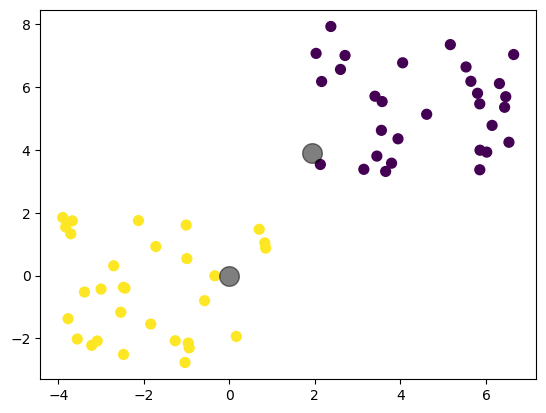

In [44]:
### TODO 7
import matplotlib.pyplot as plt
def visualise(data_path, labels, centers):
    data = load_data(data_path)

    # Scatter plot of the data points
    plt.scatter(data[:, 0], data[:, 1], c=labels, s=50, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

    ### Set title as 'K-means clustering'

    ### Set xlabel as 'Longitude'

    ### Set ylabel as 'Latitude'

    ### Save the plot as 'kmeans.png'


    ## DO NOT CHANGE THE FOLLOWING LINE
    return plt
visualise(file_path, updated_labels, updated_centers)

In [ ]:
### After you have completed the above functions, run the following code to generate the plot
data_path = file_path
K, init_centers = 2, None
centers, labels, time_taken = kmeans(data_path, K, init_centers)
print('Time taken for the algorithm to converge:', time_taken)
visualise(data_path, labels, centers)